# Household Price Prediction Model

This notebook explores and builds a model to predict household prices based on various features like location, size, and condition.

## Aim:
Predict the price of a house given certain features, using machine learning regression techniques.

## Dataset:
The dataset contains the following features:
- `date`: The date when the property was sold.
- `price`: The target variable (Sale price of the house in USD).
- `bedrooms`: The number of bedrooms in the house.
- `bathrooms`: The number of bathrooms in the house.
- `sqft_living`: The size of the living area (in square feet).
- `sqft_lot`: The size of the lot (in square feet).
- `floors`: The number of floors of the house.
- `waterfront`: Binary indicator of a waterfront view(1-present, 0-absent).
- `view`: An index from 0 to 4 indicating the quality of the property’s view.
- `condition`:An index from 1 to 5 rating the condition of the property.
- `sqft_above`: The square footage of the property above the basement.(in square feet).
- `sqft_basement`: The size of the basement (in square feet).
- `yr_built`: The year the house was built.
- `yr_renovated`: The year the property was last renovated.
- `Street`: The street address of the property.
- `City`: The city where the property is located.
- `Statezip`: The state and zip code of the property.
- `Country`: The country where the property is located.

### Preparing Data

In [93]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# Load data
df = pd.read_csv("../data/household_price_data.csv")

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
# Check for null features
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Exploratory Data Analysis (EDA)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


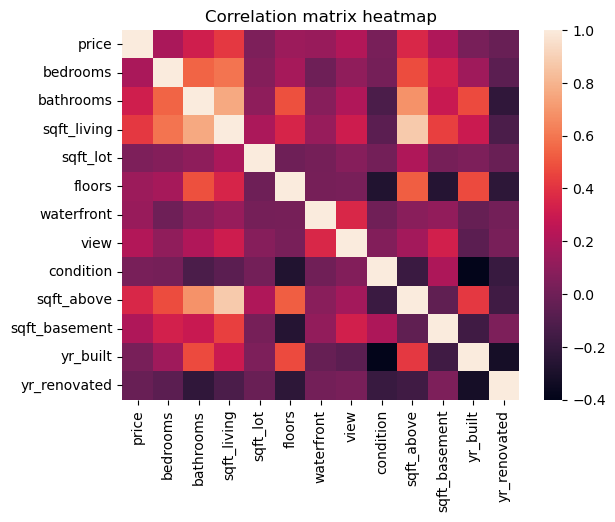

In [5]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)
plt.title("Correlation matrix heatmap")
plt.show();

#### EDA on target

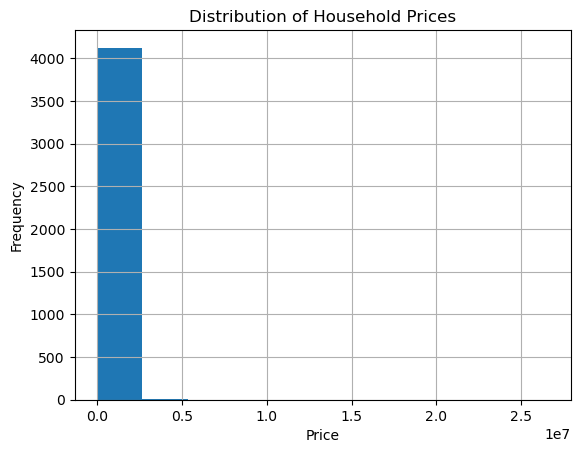

In [6]:
# Distribution of target
df["price"].hist(bins=10)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Household Prices");

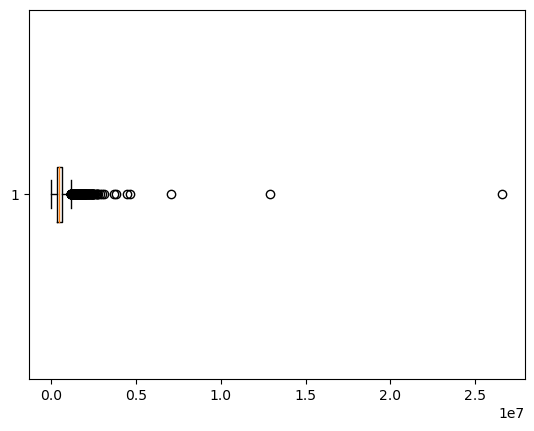

In [7]:
# Check for outliers in target
plt.boxplot(df["price"], vert=False);

In [8]:
# Remove price outliers
mask_price = df["price"] < df["price"].quantile(0.9)
df = df[mask_price]

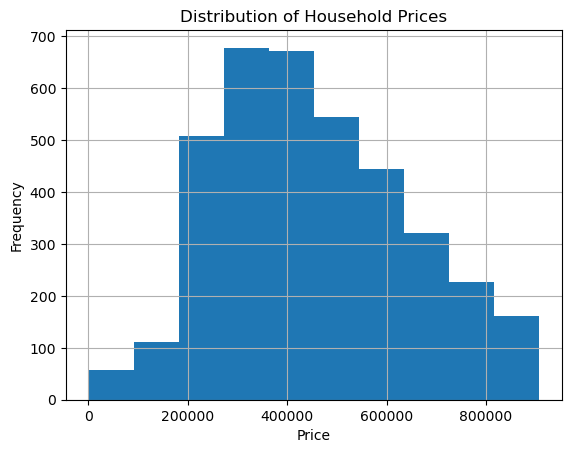

In [9]:
# Distribution of target after removing outliers
df["price"].hist(bins=10)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Household Prices");

#### EDA on features

##### Handling cardinality

In [15]:
# Checking cardinality for categorical features
df.select_dtypes("object").info()
df.select_dtypes("object").nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3726 entries, 0 to 4139
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3726 non-null   object
 1   street    3726 non-null   object
 2   city      3726 non-null   object
 3   statezip  3726 non-null   object
 4   country   3726 non-null   object
dtypes: object(5)
memory usage: 174.7+ KB


date          68
street      3670
city          43
statezip      77
country        1
dtype: int64

In [16]:
# Drop columns with high-low cardinality
df.drop(columns=["country", "street"], inplace=True)

##### EDA on numeric features

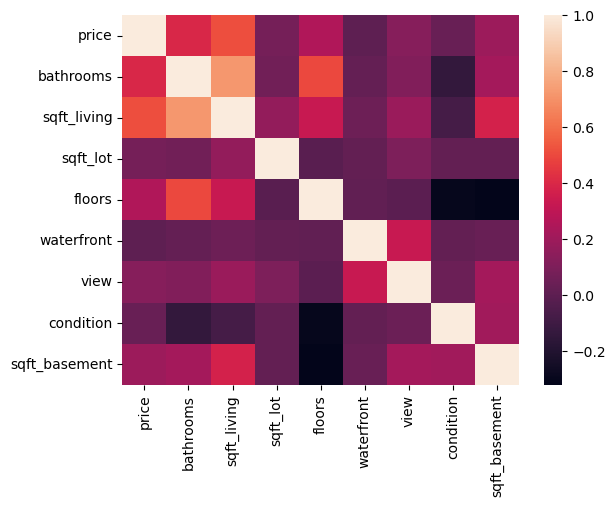

In [68]:
# Display heatmap
sns.heatmap(df.corr(numeric_only=True));

##### Handling highly correlated features

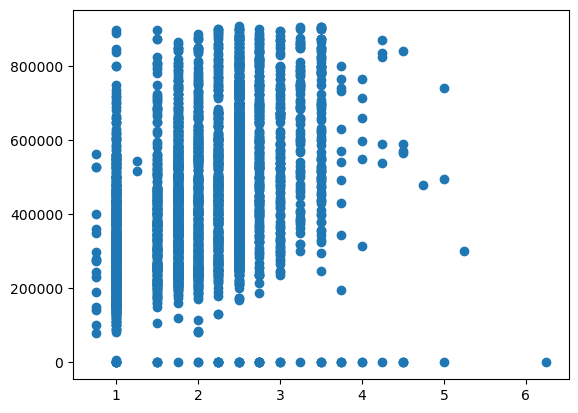

In [42]:
# Bedrooms vs Bathrooms
plt.scatter(x=df["bathrooms"], y=df["price"]);

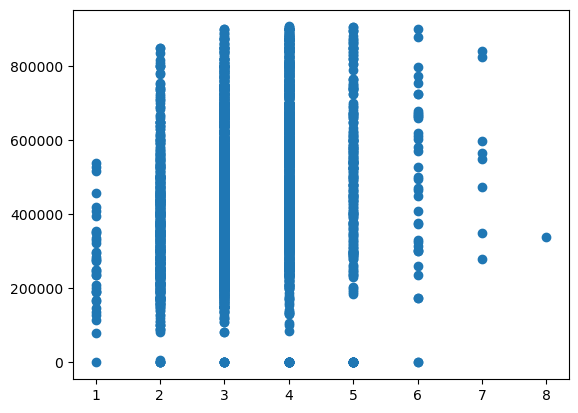

In [40]:
plt.scatter(x=df["bedrooms"], y=df["price"]);

In [ ]:
# checking correlation with price
corr_matrix["bedrooms"]["price"]
corr_matrix["bathrooms"]["price"]

0.3177853665658908

In [46]:
# Drop "bedrooms" feature
df.drop(columns=["bedrooms"], inplace=True)

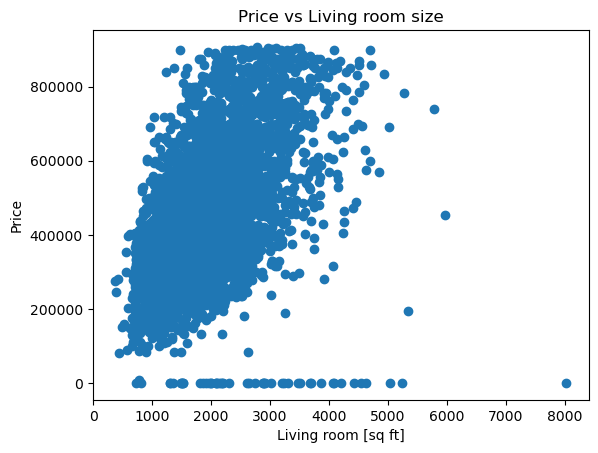

In [ ]:
# "price" vs "sqft_living"
plt.scatter(x=df["sqft_living"], y=df["price"]);
plt.xlabel("Living room [sq ft]")
plt.ylabel("Price")
plt.title("Price vs Living room size")
plt.show();

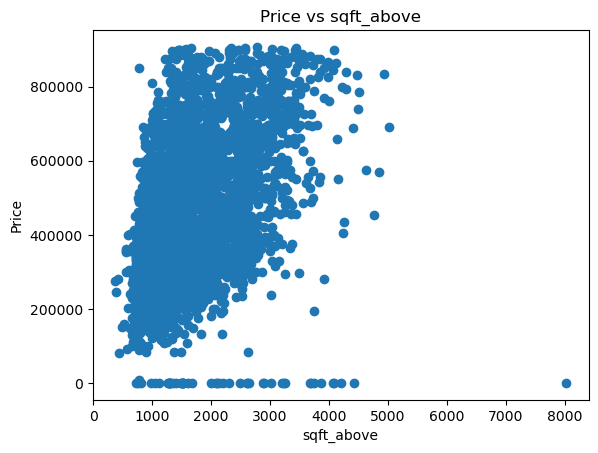

In [ ]:
# "price" vs "sqft_above"
plt.scatter(x=df["sqft_above"], y=df["price"]);
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.title("Price vs sqft_above")
plt.show();

In [55]:
# Checking correlation with target
df[["price", "sqft_living", "sqft_above"]].corr()

,price,sqft_living,sqft_above
price,1.000000,0.511326,0.431744
sqft_living,0.511326,1.000000,0.846175
sqft_above,0.431744,0.846175,1.000000


In [56]:
df.drop(columns=["sqft_above"], inplace=True)

##### Handling features with very low correlation to target

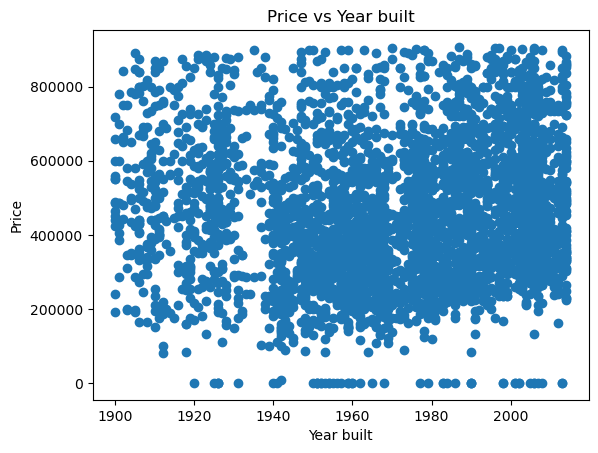

In [65]:
# "Price" vs "yr_built"
plt.scatter(x=df["yr_built"], y=df["price"]);
plt.xlabel("Year built")
plt.ylabel("Price")
plt.title("Price vs Year built")
plt.show();

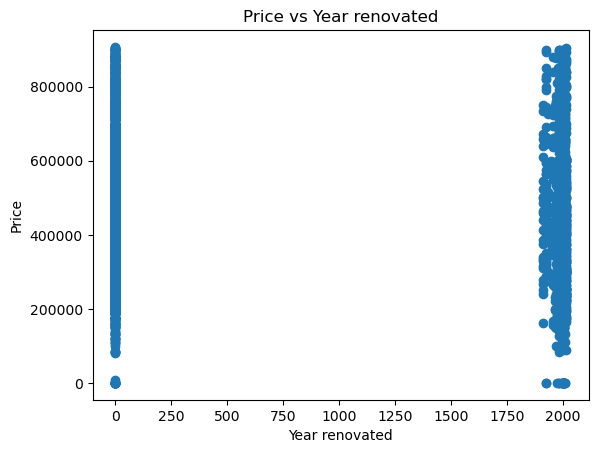

In [66]:
# "Price" vs "yr_renovated"
plt.scatter(x=df["yr_renovated"], y=df["price"]);
plt.xlabel("Year renovated")
plt.ylabel("Price")
plt.title("Price vs Year renovated")
plt.show();

In [67]:
df.drop(columns=["yr_built", "yr_renovated"], inplace=True)

##### Handling non related categorical features

In [78]:
# Drop unrelated categorical features 
df.drop(columns=["date", "statezip"], inplace=True)


#### Data preprocessing

In [85]:
# Define features
X = df.drop(columns=["price"])
y = df["price"]

# Separate city and numeric columns
categorical_features = ["city"]
numeric_features = X.drop(columns=categorical_features).columns.tolist()

# One-hot encode "city", scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore"), categorical_features),
    ]
)

# Alpha range
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# RidgeCV model
ridge_cv = RidgeCV(alphas=alphas, scoring="neg_mean_absolute_error", cv=5)

# Create pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("ridge", ridge_cv)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit model
pipeline.fit(X_train, y_train)

c:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition',
                                                   'sqft_basement']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['city'])])),
                ('ridge',
                 RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         cv=5, scoring='neg_mean_absolute_error'))])

In [87]:
y_mean = y_train.mean()
print("Mean house price:", y_mean)

y_pred_baseline = [y_mean] * len(y_train)
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean house price: 456022.1182305749
Baseline MAE: 156483.52018618677


In [90]:
y_pred_training = pipeline.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 83527.15396181149


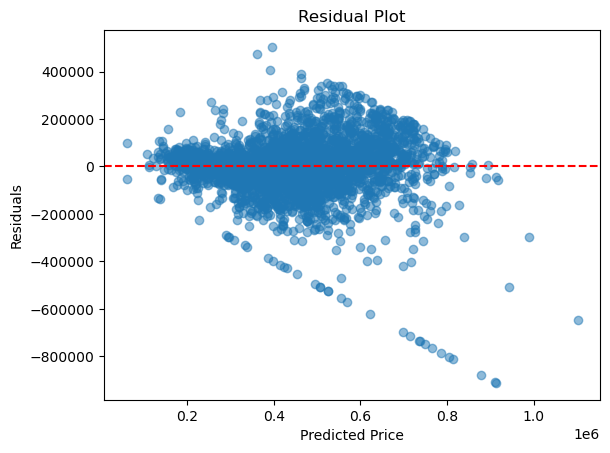

In [92]:
# Compute residuals
residuals = y_train - y_pred_training

# Plot
plt.scatter(y_pred_training, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [94]:
# Save pipeline to file
with open("../models/ridge_pipeline_base.pkl", "wb") as file:
    pickle.dump(pipeline, file)